In [1]:
import core
from submodule import baseline as bs
import numpy as np
import matplotlib.pyplot as plt
import peakutils
import pandas as pd
from matplotlib import rcParams

../data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt Opened
1
2


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


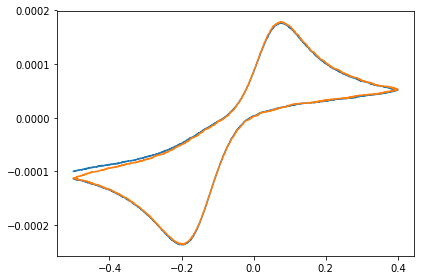

In [89]:
dict_1,n_cycle = core.read_file('../data/20MM_2,7-AQDS_1M_H2SO4_50mVs_0.5step.DTA.txt')
for i in range(n_cycle):
        print(i+1)
        df = core.data_frame(dict_1, i+1)
        plt.plot(df.Potential, df.Current, label = "Cycle{}".format(i+1))


ValueError: x and y must have same first dimension, but have shapes (62,) and (1000,)

/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


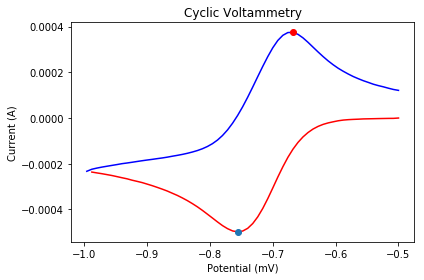

In [83]:
# Over all wrapping function.
# This i is in range of number of cycles. 

for i in range(n_cycle-1):
    i = i+1
    df = core.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
    # Peaks are here [list]
    peak_index = core.peak_detection_fxn(y)
    # Split x,y to get baselines
    x1,x2 = core.split(x)
    y1,y2 = core.split(y)
    y_base1 = core.linear_background(x1,y1)
    y_base2 = core.linear_background(x2,y2)
    # Calculations based on baseline and peak
    values = core.peak_values(x,y)
    Et = values[0]
    Eb = values[2]
    dE = core.del_potential(x,y)
    half_E = min(Et,Eb) + core.half_wave_potential(x,y)
    ia = core.peak_heights(x,y)[0]
    ic = core.peak_heights(x,y)[1]
    ratio_i = core.peak_ratio(x,y)
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.title('Cyclic Voltammetry')
plt.xlabel('Potential (mV)')
plt.ylabel('Current (A)')
plt.plot(x1[peak_index[1]],y1[peak_index[1]],marker='o')
plt.plot(x2[peak_index[0]],y2[peak_index[0]],marker='o',color = 'red')
plt.plot(x1, y_base1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_base2, color = "orangered", linestyle=':',linewidth=2) 
rcParams.update({'figure.autolayout': True})
#plt.savefig('lala',dpi=1000)
f'For this data set : Epc= {Eb} ,Epa = {Et},Ipc= {ic}, Ipa= {ia}, ∆E = {dE}, Ipc/Ipa = {ratio_i}'
plt.show
#print([dE, half_E , ia, ic, ratio_i ])


In [82]:

results_dict = {}

# df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
# Peaks are here [list]
peak_index = core.peak_detection_fxn(y)
# Split x,y to get baselines
x1,x2 = core.split(x)
y1,y2 = core.split(y)
y_base1 = core.linear_background(x1,y1)
y_base2 = core.linear_background(x2,y2)
# Calculations based on baseline and peak
values = core.peak_values(x,y)
Et = values[0]
Eb = values[2]
dE = core.del_potential(x,y)
half_E = min(Et,Eb) + core.half_wave_potential(x,y)
ia = core.peak_heights(x,y)[0]
ic = core.peak_heights(x,y)[1]
ratio_i = core.peak_ratio(x,y)
results_dict['Peak Current Ratio'] = ratio_i
results_dict['Ipc'] = ic
results_dict['Ipa'] = ia
results_dict['Epc'] = Eb
results_dict['Epa'] = Et
results_dict['∆E'] = dE
results_dict['Redox Potential'] = half_E
if dE>0.3:
    results_dict['Reversible'] = 'No'
else:
    results_dict['Reversible'] = 'Yes'

if half_E>0 and  'Yes' in results_dict.values():
    results_dict['Type'] = 'Catholyte'
elif 'Yes' in results_dict.values():
    results_dict['Type'] = 'Anolyte'
#return results_dict

IndexError: index 5 is out of bounds for axis 0 with size 0

In [47]:
print(results_dict)

{'Peak Current Ratio': 0.4122854261114623, 'Ipc': 7.924558892180777e-05, 'Ipa': 3.267180139608129e-05, 'Epc': -0.949291, 'Epa': -0.850287, '∆E': 0.09900399999999998, 'Redox Potential': -0.899789, 'Reversible': 'Yes', 'Type': 'Anolyte'}


In [38]:
results_dict = {}   
    results_dict['Peak Current Ratio'] = ratio_i
    results_dict['Ipc'] = ic
    results_dict['Ipa'] = ia
    results_dict['Epc'] = Eb
    results_dict['Epa'] = Et
    if dE>0.3:
        results_dict['Reversible'] = 'No'
    elif ratio_i<0.6:
        results_dict['Reversible'] = 'No'
    else:
        results_dict['Reversible'] = 'Yes'
    if half_E>0 and  'Yes' in results_dict.values():
        results_dict['Type'] = 'Catholyte'
    elif 'Yes' in results_dict.values():
        results_dict['Type'] = 'Anolyte'

IndentationError: unexpected indent (<ipython-input-38-786d754906c1>, line 2)